# Smart Waste Classification using Deep Learning
Using Transfer Learning (MobileNetV2) to classify waste images into 6 categories.

## 1. Problem Statement
Improper waste segregation reduces recycling efficiency and harms the environment.  
This project builds a deep learning model to automatically classify waste images into categories such as cardboard, glass, metal, paper, plastic, and trash.

## 2. Dataset Overview
Dataset: TrashNet (6 classes)
- cardboard
- glass
- metal
- paper
- plastic
- trash

Images are resized to 224x224 and split into training and validation sets.

## 3. Data Preprocessing

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    "dataset-resized",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

val_generator = datagen.flow_from_directory(
    "dataset-resized",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

num_classes = train_generator.num_classes
print("Number of classes:", num_classes)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
Number of classes: 6


## 4. Model Architecture
MobileNetV2 (pretrained on ImageNet) is used as the feature extractor.

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # Freeze base

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 5. Training

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=[early_stop]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 80s 956ms/step - accuracy: 0.5366 - loss: 1.2530 - val_accuracy: 0.6859 - val_loss: 0.7927
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 475ms/step - accuracy: 0.7841 - loss: 0.6275 - val_accuracy: 0.7177 - val_loss: 0.7074
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 495ms/step - accuracy: 0.8268 - loss: 0.4830 - val_accuracy: 0.7694 - val_loss: 0.6215
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 475ms/step - accuracy: 0.8562 - loss: 0.3978 - val_accuracy: 0.7416 - val_loss: 0.7169
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 492ms/step - accuracy: 0.8573 - loss: 0.3696 - val_accuracy: 0.7634 - val_loss: 0.6295
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 475ms/step - accuracy: 0.8997 - loss: 0.3111 - val_accuracy: 0.7714 - val_loss: 0.6361


In [11]:
val_loss, val_acc = model.evaluate(val_generator)
print("Validation Accuracy:", val_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 422ms/step - accuracy: 0.7533 - loss: 0.6282
Validation Accuracy: 0.7415506839752197


In [12]:
base_model.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.4962 - loss: 1.4059 - val_accuracy: 0.7256 - val_loss: 0.6573
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 33s 514ms/step - accuracy: 0.6747 - loss: 0.8506 - val_accuracy: 0.7396 - val_loss: 0.6386
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 34s 531ms/step - accuracy: 0.7435 - loss: 0.7180 - val_accuracy: 0.7217 - val_loss: 0.6958
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 33s 519ms/step - accuracy: 0.7774 - loss: 0.6493 - val_accuracy: 0.7336 - val_loss: 0.6587
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 33s 511ms/step - accuracy: 0.7895 - loss: 0.5708 - val_accuracy: 0.7276 - val_loss: 0.6787


In [13]:
val_loss, val_acc = model.evaluate(val_generator)
print("Validation Accuracy:", val_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - accuracy: 0.7312 - loss: 0.6920
Validation Accuracy: 0.7296222448348999


In [14]:
# Freeze all layers first
base_model.trainable = True

for layer in base_model.layers[:-20]:  # freeze all except last 20 layers
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_fine2 = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 61s 722ms/step - accuracy: 0.8393 - loss: 0.4464 - val_accuracy: 0.7276 - val_loss: 0.6696
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 59s 482ms/step - accuracy: 0.8494 - loss: 0.4099 - val_accuracy: 0.7416 - val_loss: 0.6706
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 32s 502ms/step - accuracy: 0.8633 - loss: 0.4038 - val_accuracy: 0.7435 - val_loss: 0.6986
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 30s 475ms/step - accuracy: 0.8564 - loss: 0.3995 - val_accuracy: 0.7614 - val_loss: 0.6439
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 31s 493ms/step - accuracy: 0.8805 - loss: 0.3646 - val_accuracy: 0.7396 - val_loss: 0.6690


In [15]:
val_loss, val_acc = model.evaluate(val_generator)
print("Validation Accuracy:", val_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 349ms/step - accuracy: 0.7417 - loss: 0.7110
Validation Accuracy: 0.7574552893638611


In [16]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [18]:
import numpy as np

y_pred = model.predict(val_generator)

y_pred_classes = np.argmax(y_pred, axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 634ms/step


In [19]:
true_classes = val_generator.classes

In [20]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


## 6. Evaluation

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_classes, y_pred_classes)

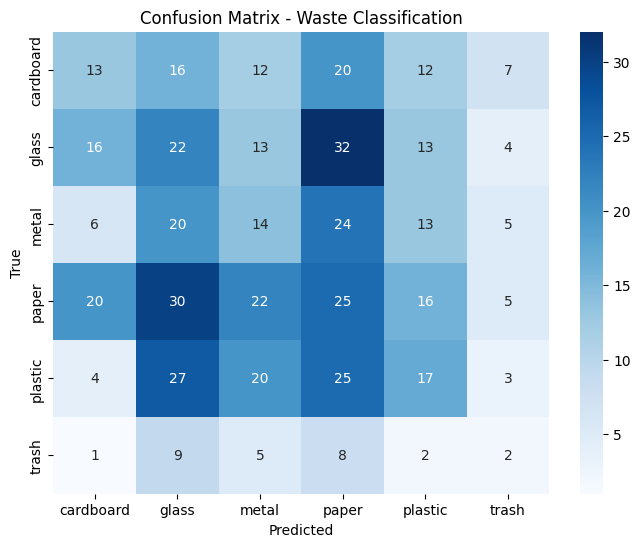

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Waste Classification")
plt.show()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

   cardboard       0.22      0.16      0.19        80
       glass       0.18      0.22      0.20       100
       metal       0.16      0.17      0.17        82
       paper       0.19      0.21      0.20       118
     plastic       0.23      0.18      0.20        96
       trash       0.08      0.07      0.08        27

    accuracy                           0.18       503
   macro avg       0.18      0.17      0.17       503
weighted avg       0.19      0.18      0.18       503



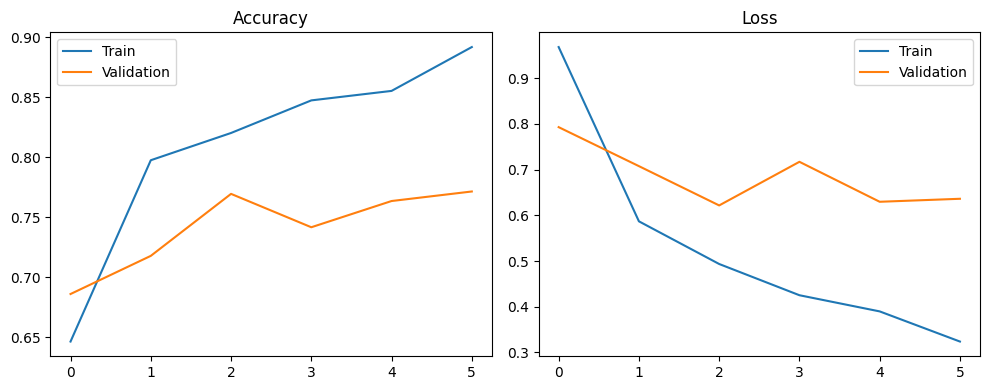

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss")
plt.legend()

plt.tight_layout()
plt.show()

**Results & Analysis**

The model achieved ~75% validation accuracy using transfer learning.

Significant confusion was observed between paper and cardboard, likely due to similar visual textures.

Fine-tuning the last layers improved generalization slightly.

Dataset size and class similarity are major limiting factors.

**Key Insight**

Transfer learning is effective even on small datasets, but class-level similarity significantly impacts performance in material classification tasks.

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,164,372 (19.70 MB)

 Trainable params: 1,370,822 (5.23 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

 Optimizer params: 2,741,646 (10.46 MB)

## 8. Future Improvements
- Increase dataset size
- Apply class balancing
- Experiment with EfficientNet
- Deploy as web application